In [11]:
from graph import FmiGraph
import json
from tqdm import tqdm
import matplotlib.pyplot as plt

input_file = "../aegaeis-ref-visibility.fmi"

graph = FmiGraph.from_fmi_file(input_file)

Processing vertices:   0%|          | 0/551588 [00:00<?, ?it/s]

In [13]:
paths_file = "../random_paths.json"


In [14]:

with open(paths_file) as f:
    d = json.load(f)




hits = [0 for _ in range(graph.vertices.shape[0])]

paths = [x["vertices"] for x in d]
for path in tqdm(paths):
    for v in path:
        hits[v] += 1

In [52]:
max_hits = max(hits)
for i in range(len(hits)):
    hits[i] /= max_hits

In [70]:
min_lon = min(graph.vertices[:,0]) / 100000
max_lon = max(graph.vertices[:,0]) / 100000
min_lat = min(graph.vertices[:,1]) / 100000
max_lat = max(graph.vertices[:,1]) / 100000

diff_lon = max_lon - min_lon
diff_lat = max_lat - min_lat

diff_lat, diff_lon

(11.0187699837646, 8.463814091666872)

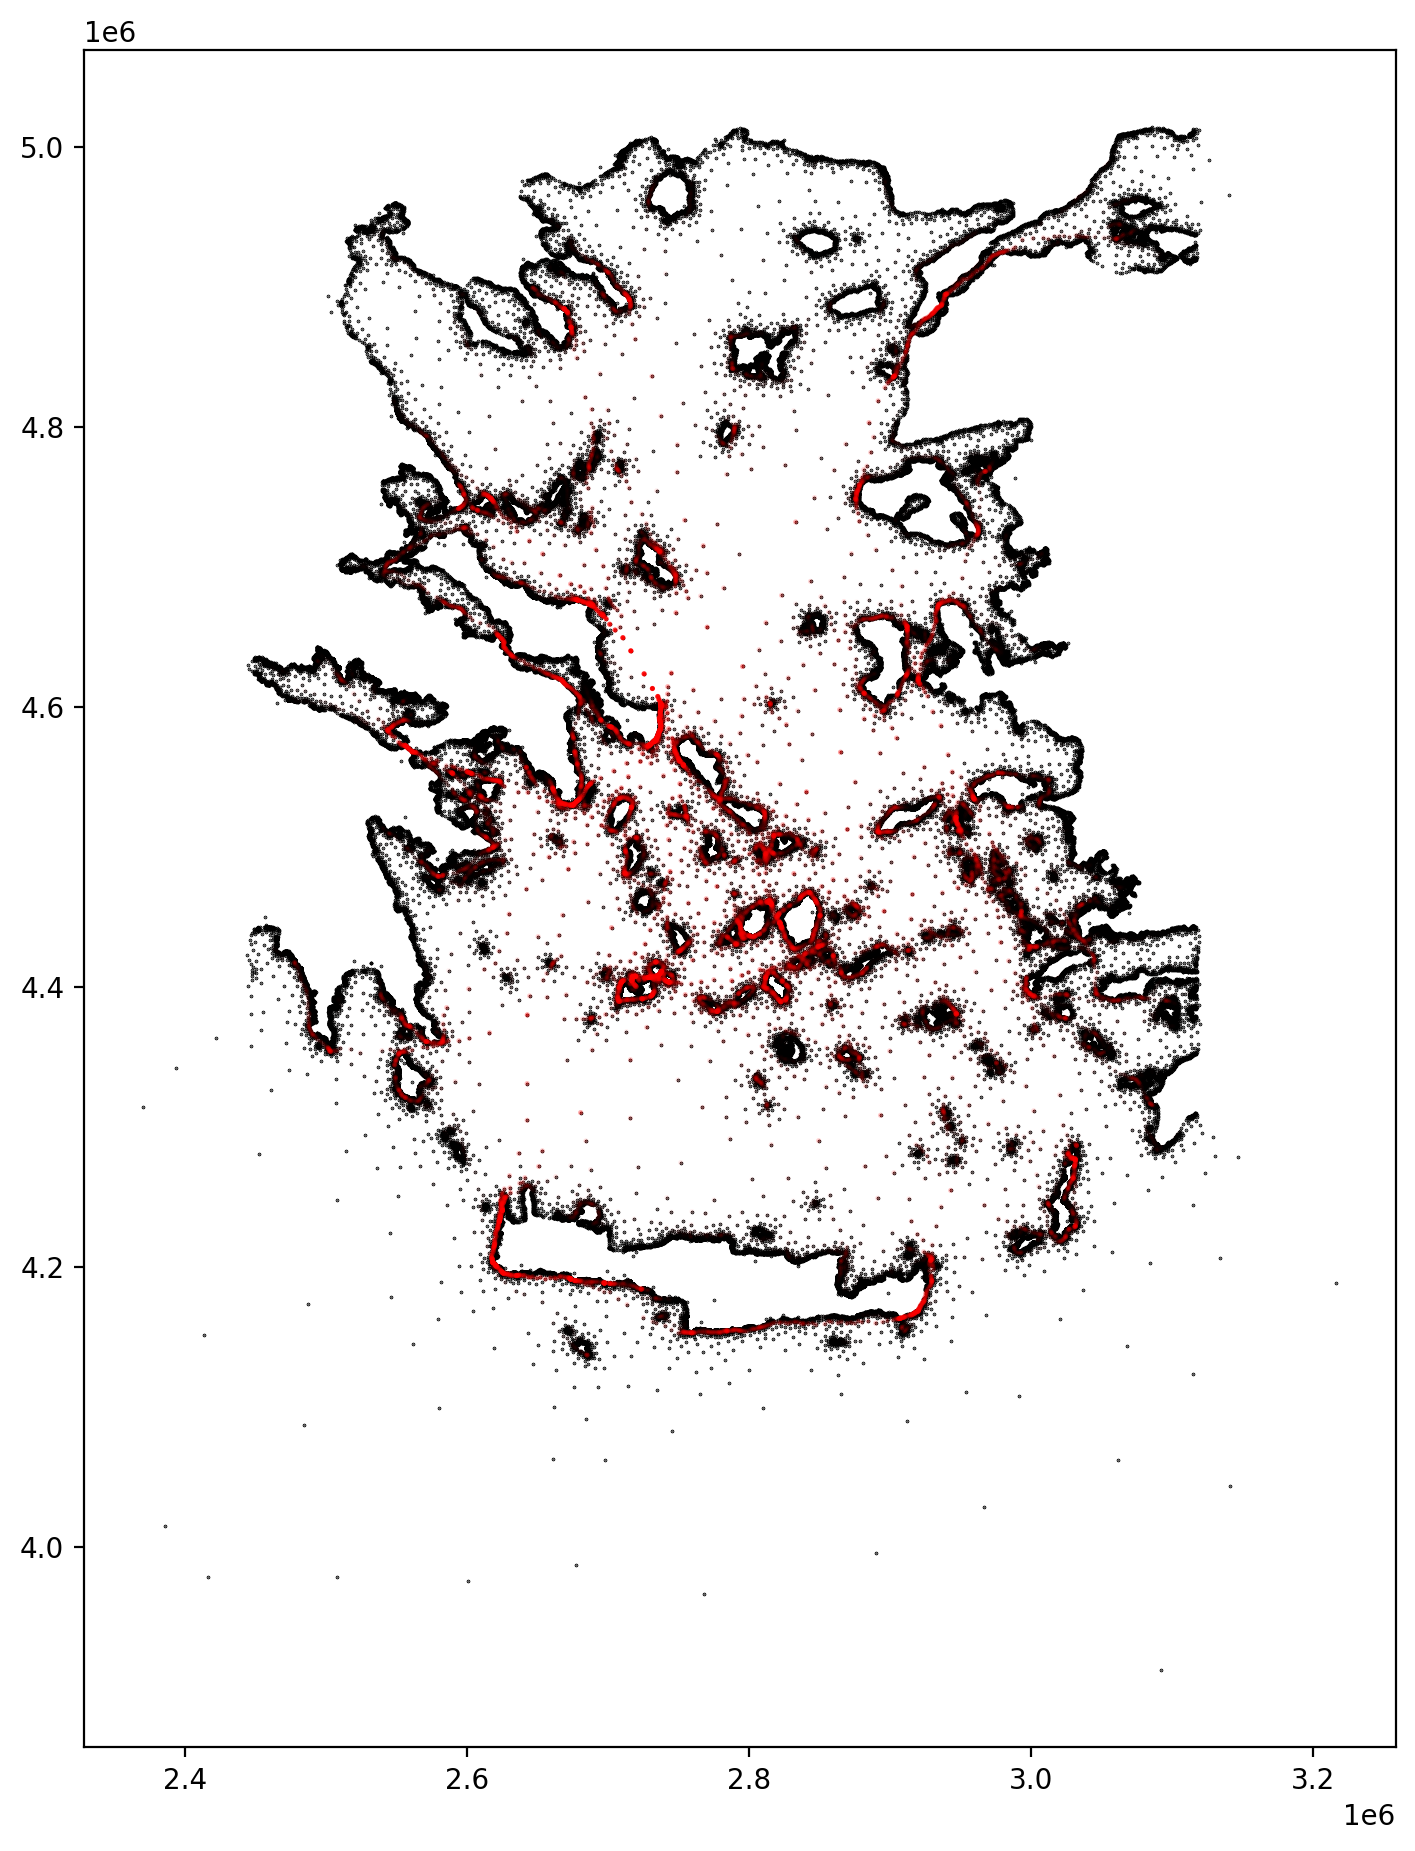

In [71]:
fig, ax = plt.subplots()
fig.set_dpi(200)


fig.set_size_inches(diff_lon, diff_lat)

plt.scatter(x=graph.vertices[:,0],y=graph.vertices[:,1], s=0.1, c="black")
plt.scatter(x=graph.vertices[:,0],y=graph.vertices[:,1], s=0.75, alpha=hits, c="red")
